In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from pytorch.mnist.pytorch_mnist import build_model, create_data_loaders

%matplotlib inline

In [2]:
df = pd.read_csv('dataset_metadata.csv')

/Users/stevethomas/anaconda3/envs/blog/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data_dir = './data/mnist'
batch_size = 16
run_on_subset = True
train_loader, test_loader = create_data_loaders(data_dir, batch_size, run_on_subset)
model, optimizer = build_model()

In [3]:
for batch_idx, (data, target, filenames) in enumerate(train_loader):
  x = data
  y = target
  f = filenames
  break

In [4]:
logits, output = model(data)

In [35]:
preds

NameError: name 'preds' is not defined

In [29]:
df = pd.DataFrame(columns=['filename', 'ground_truth', 'softmax_score'])
df.to_csv('test.csv', index=False)
df

,filename,ground_truth,softmax_score


In [30]:
data = {'filename': filenames, 'ground_truth': target.tolist(), 'softmax_score':output.tolist()}
row = pd.DataFrame(data)
row

,filename,ground_truth,softmax_score
0,2149.png,3,"[-2.2425644397735596, -2.2969143390655518, -2...."
1,4942.png,1,"[-2.3261351585388184, -2.27897310256958, -2.21..."
2,2428.png,5,"[-2.2478861808776855, -2.2595767974853516, -2...."
3,2606.png,0,"[-2.3220810890197754, -2.2411248683929443, -2...."
4,2113.png,6,"[-2.2756190299987793, -2.355272054672241, -2.1..."
5,3884.png,0,"[-2.383237838745117, -2.1783034801483154, -2.2..."
6,1356.png,5,"[-2.253680944442749, -2.2033157348632812, -2.2..."
7,4367.png,6,"[-2.203105926513672, -2.254347324371338, -2.22..."
8,3890.png,2,"[-2.3565502166748047, -2.3067069053649902, -2...."
9,296.png,0,"[-2.2722108364105225, -2.289062261581421, -2.2..."


In [31]:
df = df.append(row, ignore_index=True)
df.to_csv('test.csv', mode='a', header=False, index=False)
df

,filename,ground_truth,softmax_score
0,2149.png,3,"[-2.2425644397735596, -2.2969143390655518, -2...."
1,4942.png,1,"[-2.3261351585388184, -2.27897310256958, -2.21..."
2,2428.png,5,"[-2.2478861808776855, -2.2595767974853516, -2...."
3,2606.png,0,"[-2.3220810890197754, -2.2411248683929443, -2...."
4,2113.png,6,"[-2.2756190299987793, -2.355272054672241, -2.1..."
5,3884.png,0,"[-2.383237838745117, -2.1783034801483154, -2.2..."
6,1356.png,5,"[-2.253680944442749, -2.2033157348632812, -2.2..."
7,4367.png,6,"[-2.203105926513672, -2.254347324371338, -2.22..."
8,3890.png,2,"[-2.3565502166748047, -2.3067069053649902, -2...."
9,296.png,0,"[-2.2722108364105225, -2.289062261581421, -2.2..."


In [5]:
logits, output = model(data)
per_example_loss = F.nll_loss(output, target,  reduction='none')

In [36]:
pred = output.data.max(1, keepdim=True)[1].flatten().tolist()
ground_truth = target.tolist()

In [37]:
ground_truth

[3, 1, 5, 0, 6, 0, 5, 6, 2, 0, 0, 0, 1, 9, 4, 5]

In [38]:
pred

[7, 2, 2, 3, 2, 3, 1, 7, 7, 7, 7, 7, 7, 7, 3, 3]

In [39]:
pred - ground_truth

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [16]:
[gt==p for gt, p in zip(ground_truth, pred)]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [17]:
[1 for _ in range(10)]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [34]:
df_2 = pd.read_csv('test.csv')
df_2[df_2['ground_truth'] == 0]

,filename,ground_truth,softmax_score
3,2606.png,0,"[-2.3220810890197754, -2.2411248683929443, -2...."
5,3884.png,0,"[-2.383237838745117, -2.1783034801483154, -2.2..."
9,296.png,0,"[-2.2722108364105225, -2.289062261581421, -2.2..."
10,1771.png,0,"[-2.3974573612213135, -2.2905187606811523, -2...."
11,2806.png,0,"[-2.3141467571258545, -2.304086685180664, -2.2..."


In [3]:
print(list(df.keys()))
df.head()

['filename', 'logits', 'log_softmax_scores', 'prediction', 'last_epoch_prediction', 'classification_change', 'ground_truth', 'correct', 'loss', 'avg_batch_loss', 'loss_diff_from_avg', 'epoch', 'epoch_step']


,filename,logits,log_softmax_scores,prediction,last_epoch_prediction,classification_change,ground_truth,correct,loss,avg_batch_loss,loss_diff_from_avg,epoch,epoch_step
0,29981.png,"[0.06488434970378876, 0.052679359912872314, -0...","[-2.2209434509277344, -2.2331483364105225, -2....",0,NaN,NaN,6,False,2.355303,2.317841,0.037462,0,0
1,12753.png,"[0.07177291810512543, 0.14005449414253235, -0....","[-2.225975751876831, -2.157694101333618, -2.38...",1,NaN,NaN,9,False,2.367213,2.317841,0.049372,0,0
2,7970.png,"[-0.007546700537204742, 0.025097275152802467, ...","[-2.287449359893799, -2.254805564880371, -2.25...",5,NaN,NaN,6,False,2.378834,2.317841,0.060993,0,0
3,51961.png,"[0.11391854286193848, 0.0960918590426445, -0.0...","[-2.1956822872161865, -2.2135090827941895, -2....",5,NaN,NaN,2,False,2.315382,2.317841,-0.002459,0,0
4,1651.png,"[0.07645493000745773, 0.01714414358139038, -0....","[-2.2038631439208984, -2.263173818588257, -2.2...",0,NaN,NaN,3,False,2.441923,2.317841,0.124082,0,0


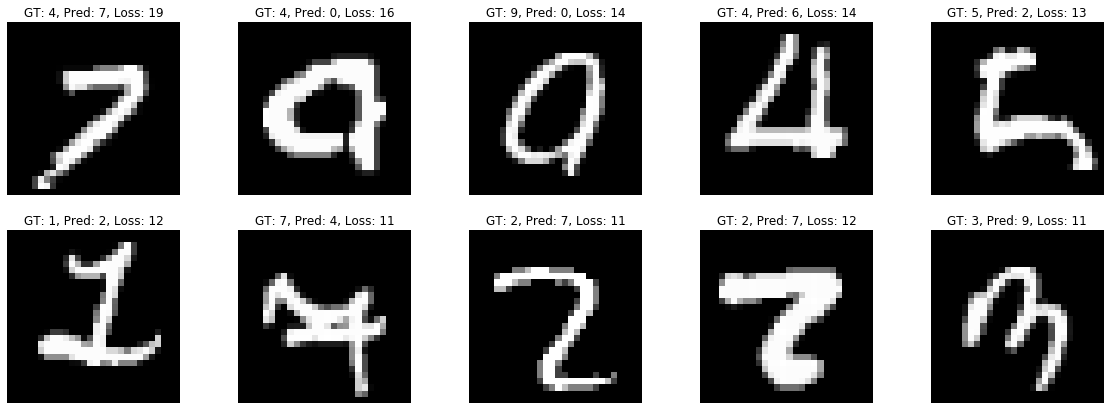

In [4]:
large_losses = df[df['epoch'] == 0].sort_values(by='loss_diff_from_avg', ascending=False)[:10]
data_dir = 'data/mnist/train'
plt.figure(figsize=(20,7))
for i, (_, row) in enumerate(large_losses.iterrows()):
  plt.subplot(2,5,i+1)
  fn = os.path.join(data_dir, row.filename)
  plt.imshow(plt.imread(fn), cmap='gray')
  plt.title('GT: {gt}, Pred: {p}, Loss: {l}'.format(gt=int(row.ground_truth), p=int(row.prediction), l=int(row.loss)))
  plt.axis('off')
plt.show()